In [83]:
from get_dataframes import get_thresholds_df
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib_venn import venn2, venn3
import numpy as np
from itertools import combinations
import math

pd.set_option('display.max_colwidth', None)


In [84]:


global_df = get_thresholds_df(results_path="../../../experiments/pyro_thresholds_final")


global_df[global_df['dataset'] == 'iris'].head(50)

['adult', 'hate_crimes', 'iris', 'leading_causes_of_death', 'ncvoter', 'sisu_ufpr_curitiba_politecnico', 'wifi_hotspot_location']
['0.001', '0.01', '0.05', '0.1', '0.15']


,threshold,dataset,lhs_size,fd,rfi_prime_plus,mu_plus,g3_prime
8529,0.001,iris,2,"['petal length', 'sepal length']->class",0.946181,0.944815,0.962963
8530,0.001,iris,2,"['petal length', 'petal width']->class",0.961160,0.958611,0.979167
8531,0.001,iris,2,"['petal width', 'sepal length']->class",0.845304,0.838583,0.900000
8532,0.001,iris,2,"['petal length', 'sepal width']->class",0.878168,0.875833,0.928571
8533,0.001,iris,2,"['petal width', 'sepal width']->class",0.921374,0.915660,0.943396
8534,0.001,iris,3,"['petal length', 'petal width', 'sepal width']->sepal length",0.380894,0.353299,0.375000
8535,0.001,iris,3,"['petal length', 'petal width', 'sepal length']->sepal width",0.412010,0.383975,0.428571
8536,0.001,iris,3,"['petal width', 'sepal length', 'sepal width']->petal length",0.438143,0.409441,0.428571
8537,0.001,iris,3,"['petal length', 'sepal length', 'sepal width']->petal width",0.413149,0.385043,0.428571
8538,0.01,iris,1,['petal length']->class,0.873179,0.869103,0.934579


In [85]:
# Create a new DataFrame that counts the number of FDs for each dataset and threshold combination
fd_counts_df = global_df.groupby(['dataset', 'threshold']).size().reset_index(name='fd_count')

# Display the resulting DataFrame
print("Number of FDs by dataset and threshold:")
fd_counts_df


Number of FDs by dataset and threshold:


,dataset,threshold,fd_count
0,adult,0.001,2066
1,adult,0.01,1678
2,adult,0.05,1016
3,adult,0.1,688
4,adult,0.15,473
5,hate_crimes,0.001,636
6,hate_crimes,0.01,774
7,hate_crimes,0.05,511
8,hate_crimes,0.1,393
9,hate_crimes,0.15,294


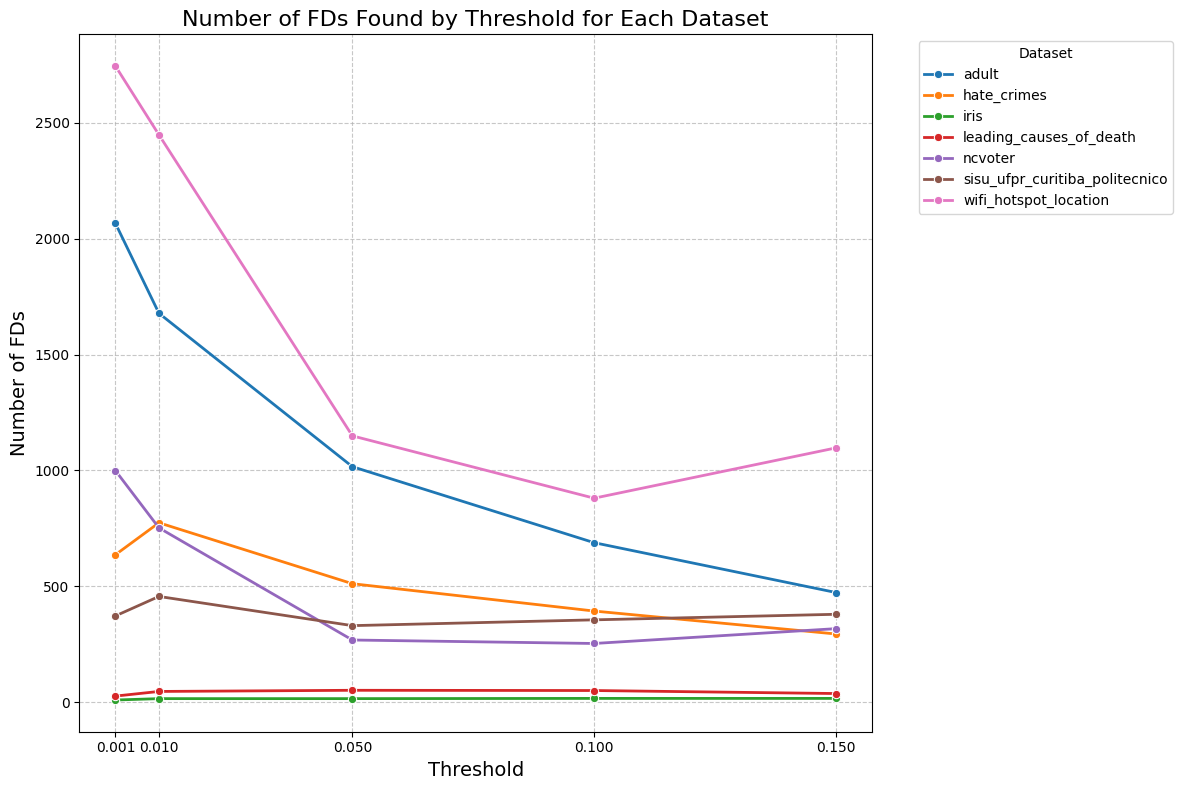

In [86]:
# Create a line plot where x-axis is threshold, y-axis is fd_count, and lines are colored by dataset
plt.figure(figsize=(12, 8))

# Convert threshold to numeric type for proper ordering on x-axis
fd_counts_df['threshold'] = pd.to_numeric(fd_counts_df['threshold'])

# Create the line plot
sns.lineplot(
    data=fd_counts_df,
    x='threshold',
    y='fd_count',
    hue='dataset',
    marker='o',
    linewidth=2
)

# Customize the plot
plt.title('Number of FDs Found by Threshold for Each Dataset', fontsize=16)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Number of FDs', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format x-axis to show all threshold values clearly
plt.xticks(fd_counts_df['threshold'].unique())

# Show the plot
plt.tight_layout()
plt.show()


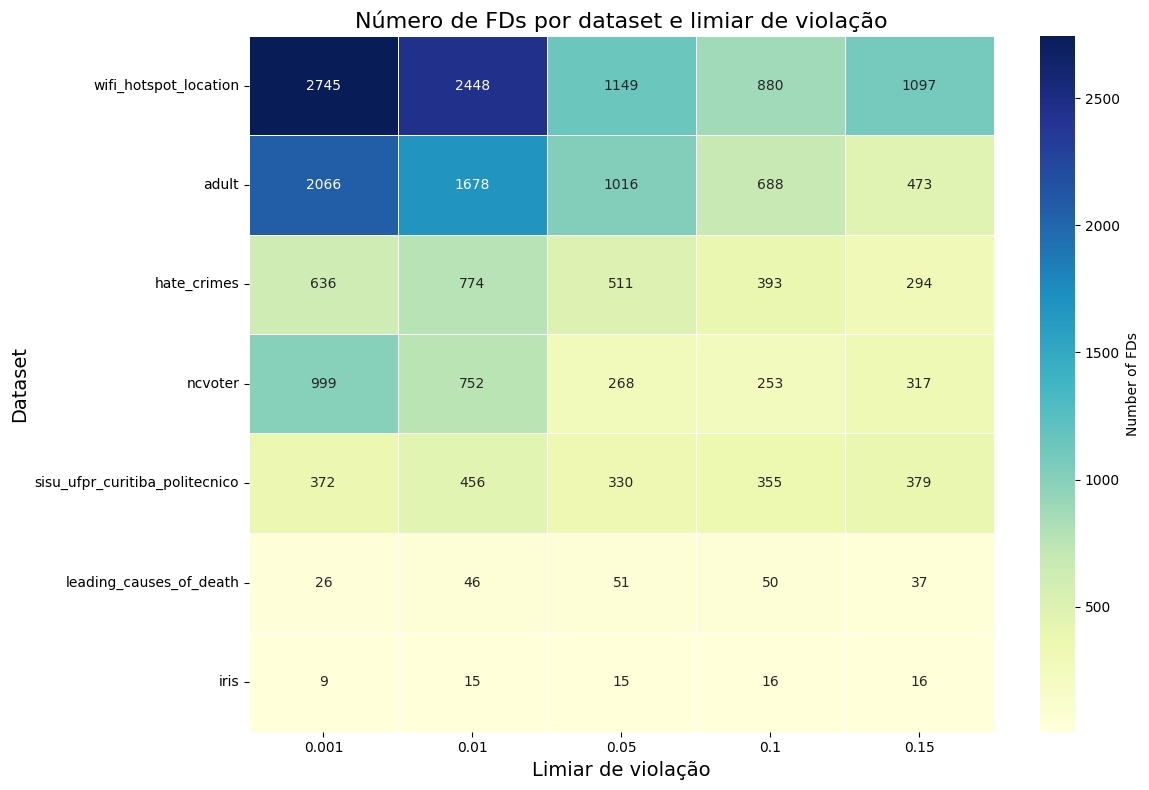

In [91]:
# Create a pivot table to reshape the data for a heatmap
# Rows are datasets, columns are thresholds, values are fd counts
heatmap_data = fd_counts_df.pivot(index='dataset', columns='threshold', values='fd_count')

# Create a heatmap
# Calculate the total FD count for each dataset to determine the order
dataset_totals = fd_counts_df.groupby('dataset')['fd_count'].sum().sort_values(ascending=False)
ordered_datasets = dataset_totals.index.tolist()

# Reindex the heatmap data to order datasets by total FD count
heatmap_data_ordered = heatmap_data.reindex(ordered_datasets)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data_ordered, 
    annot=True, 
    fmt='d',     # Display as integers
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={'label': 'Number of FDs'}
)

# Customize the plot
plt.title('Número de FDs por dataset e limiar de violação', fontsize=16)
plt.xlabel('Limiar de violação', fontsize=14)
plt.ylabel('Dataset', fontsize=14)

# Display the heatmap
plt.tight_layout()
plt.show()


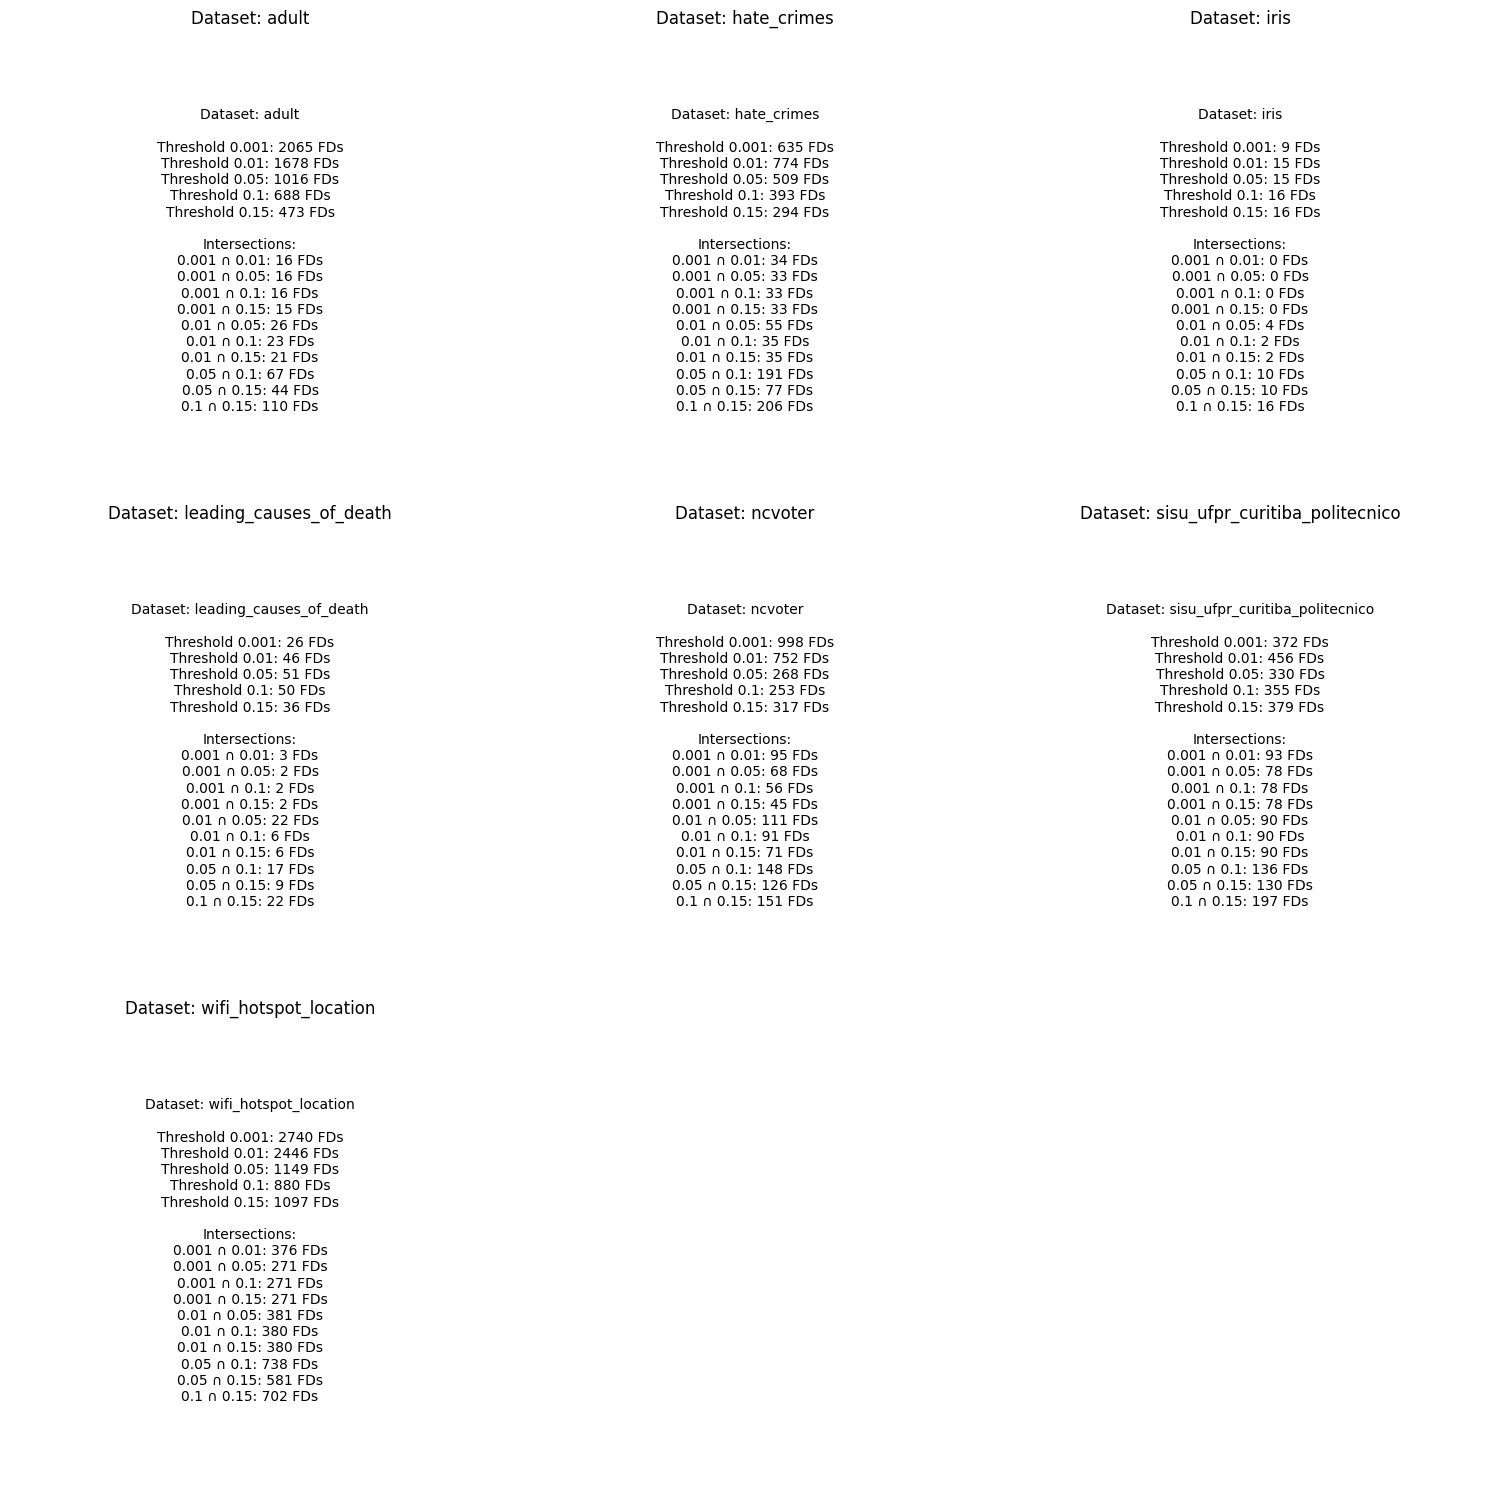

Summary of FD intersections by threshold for each dataset:

Dataset: adult
  Threshold 0.001: 2065 FDs
  Threshold 0.01: 1678 FDs
  Threshold 0.05: 1016 FDs
  Threshold 0.1: 688 FDs
  Threshold 0.15: 473 FDs
  Intersections:
    0.001 ∩ 0.01: 16 FDs (0.8% of 0.001, 1.0% of 0.01)
    0.001 ∩ 0.05: 16 FDs (0.8% of 0.001, 1.6% of 0.05)
    0.001 ∩ 0.1: 16 FDs (0.8% of 0.001, 2.3% of 0.1)
    0.001 ∩ 0.15: 15 FDs (0.7% of 0.001, 3.2% of 0.15)
    0.01 ∩ 0.05: 26 FDs (1.5% of 0.01, 2.6% of 0.05)
    0.01 ∩ 0.1: 23 FDs (1.4% of 0.01, 3.3% of 0.1)
    0.01 ∩ 0.15: 21 FDs (1.3% of 0.01, 4.4% of 0.15)
    0.05 ∩ 0.1: 67 FDs (6.6% of 0.05, 9.7% of 0.1)
    0.05 ∩ 0.15: 44 FDs (4.3% of 0.05, 9.3% of 0.15)
    0.1 ∩ 0.15: 110 FDs (16.0% of 0.1, 23.3% of 0.15)

Dataset: hate_crimes
  Threshold 0.001: 635 FDs
  Threshold 0.01: 774 FDs
  Threshold 0.05: 509 FDs
  Threshold 0.1: 393 FDs
  Threshold 0.15: 294 FDs
  Intersections:
    0.001 ∩ 0.01: 34 FDs (5.4% of 0.001, 4.4% of 0.01)
    0.001 ∩ 0.05: 

In [88]:
# Get unique datasets and thresholds
datasets = global_df['dataset'].unique()
thresholds = sorted(global_df['threshold'].unique(), key=float)

# Calculate number of rows and columns for subplot grid
# We'll create one plot per dataset
n_datasets = len(datasets)
n_cols = min(3, n_datasets)  # Maximum 3 plots per row
n_rows = math.ceil(n_datasets / n_cols)

# Create the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
if n_rows * n_cols == 1:
    axes = np.array([axes])
axes = axes.flatten()

# For each dataset, create a Venn diagram showing FD overlap between thresholds
for i, dataset in enumerate(datasets):
    # Filter data for this dataset
    dataset_df = global_df[global_df['dataset'] == dataset]
    
    # Get FDs for each threshold
    fd_sets = {}
    for threshold in thresholds:
        fd_set = set(dataset_df[dataset_df['threshold'] == threshold]['fd'])
        fd_sets[threshold] = fd_set
    
    # Select the current subplot
    ax = axes[i]
    
    # If we have 2 or 3 thresholds, we can use matplotlib_venn
    if len(thresholds) == 2:
        venn2([fd_sets[thresholds[0]], fd_sets[thresholds[1]]],
              set_labels=[f'Threshold {thresholds[0]}', f'Threshold {thresholds[1]}'],
              ax=ax)
    elif len(thresholds) == 3:
        venn3([fd_sets[thresholds[0]], fd_sets[thresholds[1]], fd_sets[thresholds[2]]],
              set_labels=[f'Threshold {thresholds[0]}', f'Threshold {thresholds[1]}', f'Threshold {thresholds[2]}'],
              ax=ax)
    else:
        # For more than 3 thresholds, we'll just show a simple text-based summary
        ax.text(0.5, 0.5, f"Dataset: {dataset}\n\n" + 
                "\n".join([f"Threshold {t}: {len(fd_sets[t])} FDs" for t in thresholds]) + 
                "\n\nIntersections:\n" + 
                "\n".join([f"{a} ∩ {b}: {len(fd_sets[a] & fd_sets[b])} FDs" 
                          for a, b in combinations(thresholds, 2)]),
                ha='center', va='center', fontsize=10)
        ax.axis('off')
    
    ax.set_title(f"Dataset: {dataset}")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Create a more detailed summary of FD intersections
print("Summary of FD intersections by threshold for each dataset:")
for dataset in datasets:
    print(f"\nDataset: {dataset}")
    
    # Filter data for this dataset
    dataset_df = global_df[global_df['dataset'] == dataset]
    
    # Get FDs for each threshold
    fd_sets = {}
    for threshold in thresholds:
        fd_set = set(dataset_df[dataset_df['threshold'] == threshold]['fd'])
        fd_sets[threshold] = fd_set
        print(f"  Threshold {threshold}: {len(fd_set)} FDs")
    
    # Calculate and print intersections
    print("  Intersections:")
    for a, b in combinations(thresholds, 2):
        intersection = fd_sets[a] & fd_sets[b]
        a_percentage = len(intersection)/len(fd_sets[a])*100 if len(fd_sets[a]) > 0 else 0
        b_percentage = len(intersection)/len(fd_sets[b])*100 if len(fd_sets[b]) > 0 else 0
        print(f"    {a} ∩ {b}: {len(intersection)} FDs ({a_percentage:.1f}% of {a}, {b_percentage:.1f}% of {b})")


In [89]:
# Create a DataFrame with FD intersections between thresholds 0.01 and 0.001
print("\nCreating DataFrame of FD intersections between thresholds 0.01 and 0.001:")
# Create a list to store intersection data
intersection_data = []

dataset = "wifi_hotspot_location"

print(dataset)

    # Filter data for this dataset
dataset_df = global_df[global_df['dataset'] == dataset]

# Get FDs for thresholds 0.001 and 0.01
fd_set_0001 = set(dataset_df[dataset_df['threshold'] == "0.001"]['fd'])
fd_set_001 = set(dataset_df[dataset_df['threshold'] == "0.01"]['fd'])

# Calculate intersection
intersection = fd_set_0001 & fd_set_001

global_df[global_df['fd'].isin(intersection)].drop_duplicates(subset=['fd'])
# global_df[global_df['fd'].isin(intersection)].drop_duplicates(subset=['fd']).to_csv(f"intersection_{dataset}.csv", index=False)




Creating DataFrame of FD intersections between thresholds 0.01 and 0.001:
wifi_hotspot_location


,threshold,dataset,lhs_size,fd,rfi_prime_plus,mu_plus,g3_prime
13291,0.001,wifi_hotspot_location,1,['DOITT_ID']->OBJECTID,1.000000,1.000000,1.000000
13292,0.001,wifi_hotspot_location,1,['OBJECTID']->Type,1.000000,1.000000,1.000000
13293,0.001,wifi_hotspot_location,1,['OBJECTID']->Location_T,1.000000,1.000000,1.000000
13294,0.001,wifi_hotspot_location,1,['OBJECTID']->BCTCB2010,1.000000,1.000000,1.000000
13295,0.001,wifi_hotspot_location,1,['OBJECTID']->Postcode,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...
15464,0.001,wifi_hotspot_location,2,"['BBL', 'Neighborhood Tabulation Area (NTA)']->Y",0.133818,0.115577,0.141941
15501,0.001,wifi_hotspot_location,2,"['BBL', 'Neighborhood Tabulation Area Code (NTACODE)']->Latitude",0.132690,0.115364,0.140110
15512,0.001,wifi_hotspot_location,2,"['BIN', 'Postcode']->Name",0.582937,0.306528,0.591207
15554,0.001,wifi_hotspot_location,2,"['BBL', 'Neighborhood Tabulation Area Code (NTACODE)']->Y",0.133818,0.115577,0.141941


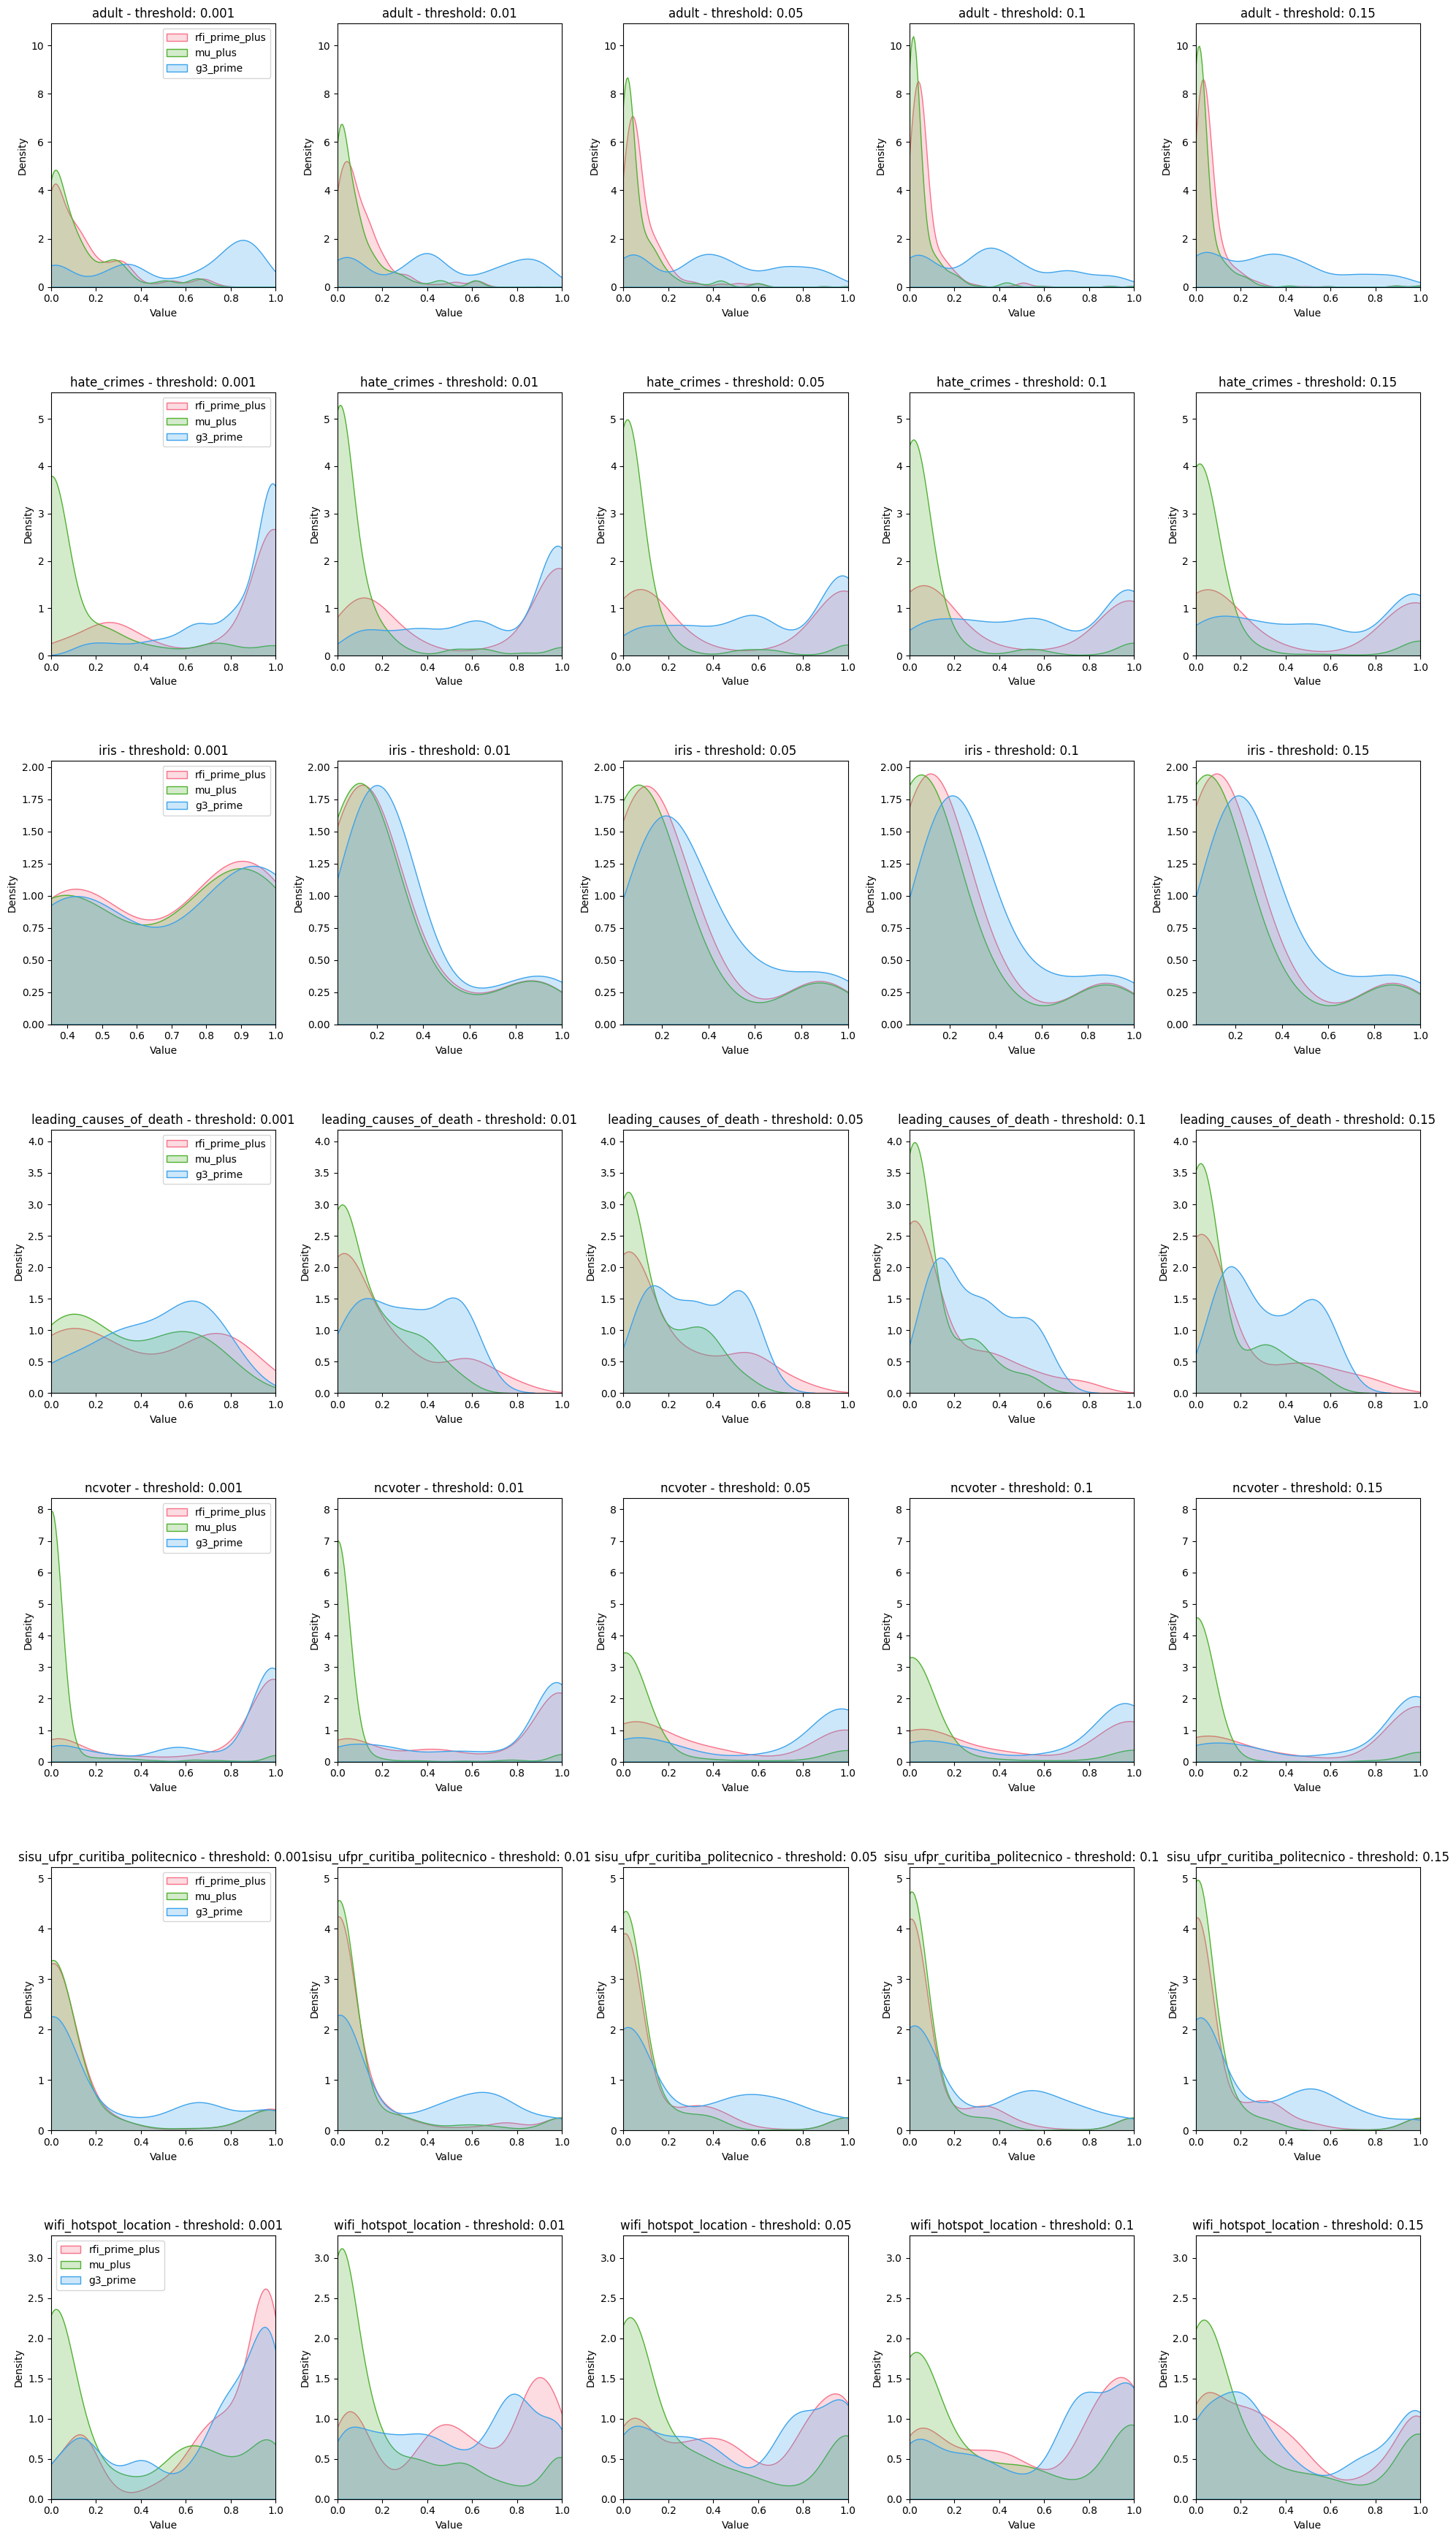

In [90]:
valid_columns=["rfi_prime_plus", "mu_plus", "g3_prime"]
datasets = global_df['dataset'].unique()
thresholds = sorted(global_df['threshold'].unique())

# Create a figure with subplots - one row per dataset, one column per threshold
fig, axes = plt.subplots(len(datasets), len(thresholds), figsize=(20, 5*len(datasets)))
fig.tight_layout(pad=3.0)

# First pass: plot all KDEs and find max y values for each dataset
dataset_max_y = {dataset: 0 for dataset in datasets}

# Iterate through datasets (rows)
for i, dataset in enumerate(datasets):
    # Filter data for this dataset
    dataset_df = global_df[global_df['dataset'] == dataset]
    
    # Iterate through thresholds (columns)
    for j, threshold in enumerate(thresholds):
        # Filter data for this threshold
        threshold_df = dataset_df[dataset_df['threshold'] == threshold]
        
        # Set the current subplot
        if len(datasets) == 1:
            ax = axes[j]
        else:
            ax = axes[i, j]
        
        # Plot KDE for each metric on this subplot
        min_value = float("inf")
        max_value = 1
        
        for idx, col in enumerate(valid_columns):
            series = threshold_df[col].dropna()
            if series.empty:
                continue
            sns_plot = sns.kdeplot(series, label=col, color=palette[idx], fill=True, ax=ax)
            if not series.empty:
                min_value = min(min_value, series.min())
                max_value = max(max_value, series.max())
        
        # Get the y-axis limits and update max y value for this dataset
        y_lim = ax.get_ylim()
        dataset_max_y[dataset] = max(dataset_max_y[dataset], y_lim[1])
        
        # Set subplot title and labels
        ax.set_title(f"{dataset} - threshold: {threshold}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Density")
        
        # Only add legend to the first plot to avoid redundancy
        if j == 0:
            ax.legend()
        
        # Set x-axis limits if we have valid data
        if min_value != float("inf") and max_value != float("-inf"):
            ax.set_xlim(min_value, max_value)

# Second pass: set the same y-axis limits for all plots in the same row (dataset)
for i, dataset in enumerate(datasets):
    for j in range(len(thresholds)):
        if len(datasets) == 1:
            ax = axes[j]
        else:
            ax = axes[i, j]
        
        # Set y-axis limits to be the same for all plots in this row
        ax.set_ylim(0, dataset_max_y[dataset])

plt.subplots_adjust(hspace=0.4)
